# <center> Lab 6 Examples 
## <center>    Power Series and Parametric Functions

**Video**: https://youtu.be/8mdEnrX7jRs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

sp.var('x t')


(x, t)

### Power Series

SymPy has commmand to generate power series for a given function: `sp.series(f,x,a,n)`, where `f` is your SymPy function, `x` is your variable, `a` is a point around which we take our power series (by default it's 0) and `n` is degree of your polynomial. Note, `n` is actually degree of the next term, so if you need Taylor polynomial of degree 4, you should take $n=5$:

In [2]:
f=sp.exp(x)
psf0=sp.series(f,x,n=6)
psf0

1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6)

In [3]:
psf1=sp.series(f,x,1,n=6)
psf1

E + E*(x - 1) + E*(x - 1)**2/2 + E*(x - 1)**3/6 + E*(x - 1)**4/24 + E*(x - 1)**5/120 + O((x - 1)**6, (x, 1))

Notice that in each case, we get an extra term (i.e. $+O(x^6)$). This is a Big-O notation. In essence it gives you degree of the next term. However, we don't actually want it because we want to treat our polynomial as a function so that we can plot it. To remove it this term, we can add `.removeO()`:

In [4]:
psf0=sp.series(f,x,n=6).removeO()
psf0

x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1

Now we can plot it as any other function:

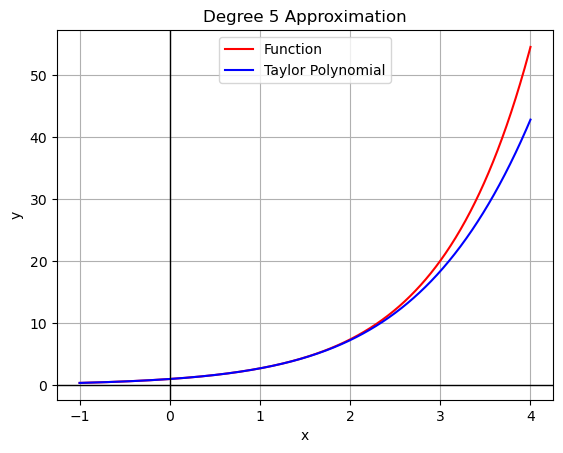

In [6]:
psfn=sp.lambdify(x,psf0,'numpy')
fn=sp.lambdify(x,f,'numpy')

xval=np.linspace(-1,4,1000)
fig=plt.figure()

plt.plot(xval,fn(xval), color='red', label="Function")
plt.plot(xval,psfn(xval), color='blue', label="Taylor Polynomial")

plt.axhline(0, color='black', lw=1)  
plt.axvline(0, color='black', lw=1) 

plt.title("Degree 5 Approximation")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.legend()
plt.show()

### Parametric Function

Consider a parametric function: $x(t)=\frac{\cos(5t)}{2}+\frac{\sin(2t/3)}{3}$ and $y(t)=\frac{\sin(5t)}{2}+\frac{\cos(2t/3)}{3}$. Here $t$ is a parameter and for each value of $t$, ($x(t) , y(t))$ is a point on the graph of our parametric function. Let's plot it:

In [7]:
xt=sp.cos(5*t)/2+sp.sin(2*t/3)/3
yt=sp.sin(5*t)/2+sp.cos(2*t/3)/3

xtn=sp.lambdify(t,xt,'numpy')
ytn=sp.lambdify(t,yt,'numpy')

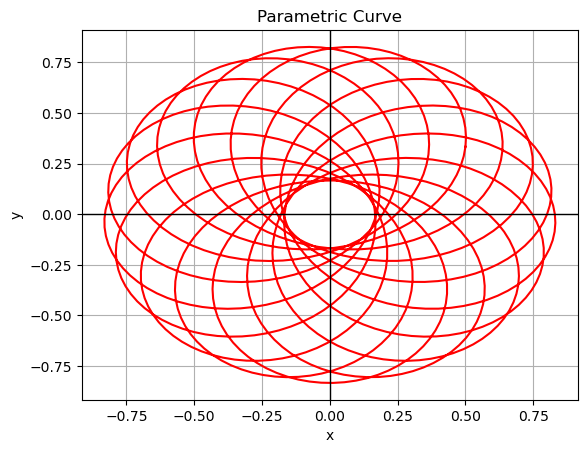

In [9]:
tval=np.linspace(0,6*np.pi,1000)  # The period of this function is 6*Pi. Think of why?

fig=plt.figure()

plt.plot(xtn(tval),ytn(tval), color='red')

plt.axhline(0, color='black', lw=1)  
plt.axvline(0, color='black', lw=1)  

plt.title("Parametric Curve")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

We can also find the arclenght of this curve by using the following formula:
    $$\int_a^b\sqrt{(x'(t))^2+(y'(t))^2}dt,$$
where $a$ and $b$ starting and ending value of $t$. 
So, in our case we can take $a=0$ and $b=6\pi$, since this defines a full period.

In [10]:
integ=sp.sqrt(sp.diff(xt,t)**2+sp.diff(yt,t)**2)
sp.integrate(integ,(t,0,6*sp.pi))

Integral(sqrt(16*sin(2*t/3)**2 - 360*sin(2*t/3)*cos(5*t) + 2025*sin(5*t)**2 - 360*sin(5*t)*cos(2*t/3) + 16*cos(2*t/3)**2 + 2025*cos(5*t)**2), (t, 0, 6*pi))/18

These integrals are generally quite complicated and even take a few seconds to solve. In this case, we didint get a nice answer and so we are forced to use `N` function.

In [11]:
sp.N(sp.integrate(integ,(t,0,6*sp.pi)))

47.2170200892207